# Section 4 - Computer vision-based machine learning #
## Mini-project 4: Introduction to `SciNet` architecture ##

## Dr. Antonin Vacheret (avachere@imperial.ac.uk) 
## High Energy Physics Group
## 523 Blackett Lab

#### The markdown comments were added by Shingo Hayashida (s.hayashida@imperial.ac.uk) ####
* [Original repository](https://github.com/fd17/SciNet_PyTorch)
* [Reference](https://arxiv.org/abs/1807.10300)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
from matplotlib import pyplot as plt
import torch.optim as optim
from utils import pendulum as solution

In [2]:
# Generate training data
tmax = 10
A0 = 1
delta0 = 0
m = 1

train_outputs = []
train_inputs = []
data = []
N_TRAIN = 100000

N_SAMPLE = 50

counter = 0
while len(train_inputs) < N_TRAIN:

    b = np.random.uniform(0.5,1)
    k = np.random.uniform(5,10)
    tprime = np.random.uniform(0,tmax)
    question = tprime
    answer = solution(tprime,A0,delta0,k,b,m)
    if answer == None:
        continue

    t_arr = np.linspace(0,tmax,N_SAMPLE)
    x = solution(t_arr,A0,delta0,k,b,m)
    

    
    
    combined_inputs = np.append(x, question)
    train_inputs.append( combined_inputs )
    train_outputs.append( answer )


train_inputs = np.array(train_inputs)
train_outputs = np.array(train_outputs)
np.save("training_data/inputs.npy", train_inputs)
np.save("training_data/outputs.npy", train_outputs)


* `train_inputs` are composed of 50 points of pendulum oscillation and a time from the start as a question.
* `train_outputs` are the answers to the questions (i.e. deviation of the pendulum from the center)

question: 3.019860356415843
answer: 0.01772638446706922


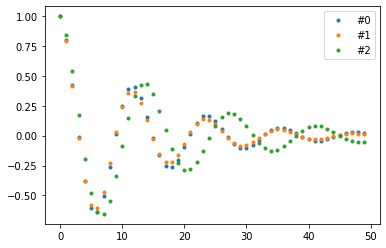

In [3]:
# Plot example training input
plt.plot(train_inputs[0][0:-1],".", label='#0')
plt.plot(train_inputs[1][0:-1],".", label='#1')
plt.plot(train_inputs[2][0:-1],".", label='#2')
plt.legend()
print("question:",train_inputs[0][-1])
print("answer:",train_outputs[0])